# 📧🐷🚫**Job Offer Spam Detection**
This deep learning model leverages Long Short-Term Memory (LSTM) networks to
detect spam in job offer messages with high precision.
By capturing sequential patterns and contextual cues in text, the model
distinguishes legitimate opportunities from deceptive or unsolicited content.
Designed for real-world deployment, it reflects a strategic blend of NLP
preprocessing, tokenization, and temporal modeling—ideal for inbox filtering,
recruitment platforms, or fraud prevention systems.

In [1]:
!pip install kagglehub[pandas-datasets]

### 📚**Creating the dataset**
In the process of creating the dataset, the dataset is created manually by using the existing datasets online. Since there are no datasets for job spam and ham, I will use the dataset of [Rashmi Shree](https://www.kaggle.com/datasets/rasho330/job-application-email-anonymized-and-feature-rich?select=job_app_confirmation_emails_anonymized.csv) of Job Application Email. The *email body* column is extracted and label them as ham.

Moreover, the dataset of [Puru Singhvi](https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset) was used to retrieve samples of spam and ham email datasets.

In [1]:
# Importing the necessary packages
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

f:\MachineLearning\Spam_Email_Checker\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Downloading the Datasets
job_application = kagglehub.dataset_download("rasho330/job-application-email-anonymized-and-feature-rich")
spam_ham = kagglehub.dataset_download("purusinghvi/email-spam-classification-dataset")

In [11]:
# Check the directory
print(os.listdir(job_application))
print(os.listdir(spam_ham))

# Navigate to the csv
job_application_dataset = os.path.join(job_application, "job_app_confirmation_emails_anonymized.csv")
spam_ham_dataset = os.path.join(spam_ham, "combined_data.csv")

['job_app_confirmation_emails_anonymized.csv']
['combined_data.csv']


In [12]:
# Loading the dataset in a pandas dataframe
job_application_df = pd.read_csv(job_application_dataset)
spam_ham_df = pd.read_csv(spam_ham_dataset)

display(job_application_df.head())
display(spam_ham_df)

,Unnamed: 0,sender,date,parsed_datetime,date_only,week,month,year,days_since,email_body,company,subject
0,0,Tesco Careers <noreply.careers@tesco.com>,"4/2/25, 1:30 AM",2025-04-02 01:30:00,2025-04-02,14,4,2025,9,"Hello Micheal Gary Scott, \n \nWe’ve received ...",Tesco,Decision Scientist at Tesco: we’ve got your ap...
1,1,LinkedIn <jobs-noreply@linkedin.com>,"4/2/25, 1:22 AM",2025-04-02 01:22:00,2025-04-02,14,4,2025,9,Your application was sent to Healthify\n͏ ͏ ͏ ...,Healthify,"Michael Gary Scott, your application was sent ..."
2,2,noreply@mail.amazon.jobs,"4/2/25, 1:18 AM",2025-04-02 01:18:00,2025-04-02,14,4,2025,9,Thank you for Applying to Amazon!\nAmazon.jobs...,Amazon,Thank you for Applying to Amazon!
3,3,IBM Talent Acquisition <talent@ibm.com>,"4/2/25, 1:11 AM",2025-04-02 01:11:00,2025-04-02,14,4,2025,9,IBM Careers\nIBM Careers IBM \n \nDear Micheal...,IBM,You have successfully submitted your IBM job a...
4,4,IBM Talent Acquisition <talent@ibm.com>,"4/2/25, 1:09 AM",2025-04-02 01:09:00,2025-04-02,14,4,2025,9,IBM Careers\nIBM Careers IBM \n \nRef: 14499 -...,IBM,Your IBM Application: Next Steps


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [13]:
# Creating a dataframe for job emails and labeling them 0 (Ham)
job_emails_df = pd.DataFrame(job_application_df["email_body"]) # Extracting the email_body column
job_emails_df["label"] = 0 # Creating a new label and labeling them as HAM (0)

# Rename the email_body column to text
job_emails_df.rename(columns={"email_body": "text"}, inplace=True) # Rename the column "email_body" to "text"

display(job_emails_df)

,text,label
0,"Hello Micheal Gary Scott, \n \nWe’ve received ...",0
1,Your application was sent to Healthify\n͏ ͏ ͏ ...,0
2,Thank you for Applying to Amazon!\nAmazon.jobs...,0
3,IBM Careers\nIBM Careers IBM \n \nDear Micheal...,0
4,IBM Careers\nIBM Careers IBM \n \nRef: 14499 -...,0
...,...,...
492,"\nDear Michael Gary Scott,\nThank you for your...",0
493,Hello Michael Gary Scott -\nWe really apprecia...,0
494,"Dear Michael Gary Scott,\nThank you for your i...",0
495,{Other.Company\nDear Michael Gary Scott:\n \nT...,0


In [14]:
# Dropping 50% of the ham (0) and 50% of the spam emails in the spam and ham dataset
ham_emails = spam_ham_df[spam_ham_df['label'] == 0].sample(frac=0.5, random_state=42)
spam_emails = spam_ham_df[spam_ham_df['label'] == 1].sample(frac=0.5, random_state=42)

spam_ham_copy = pd.concat([ham_emails, spam_emails]).sample(frac=1).reset_index(drop=True)

display(spam_ham_copy)

,label,text
0,0,"louise ,\nfurther to my previous e - mail , at..."
1,0,on escapenumber escapenumber escapenumber chro...
2,0,vice president and general counsel\nenron whol...
3,1,but when on the timepieces that we call agains...
4,1,the colour and shape vary depending on their l...
...,...,...
41719,1,sign progress twenty one getting parents turn ...
41720,0,( see attached file : hplno 425 . xls )\n- hpl...
41721,0,folks :\nit is my pleasure to announce the vis...
41722,0,dear r experts this should be a simple questio...


I dropped **50% of both ham and spam samples** from the spam_ham dataset before merging it with the job_emails dataset. This step prevents class imbalance and ensures the model learns richer, job‑related vocabulary for more accurate spam detection.

**Added:** Created a custom dataset, specifically for job application

In [15]:
# Get the customized dataset
custom_df = pd.read_csv("custom_ham_spam.csv")

# Check if text and label columns are the same with the previous datasets
display(custom_df)

,text,label
0,InnoSoft is currently seeking an experienced S...,0
1,Congratulations! You have been shortlisted for...,1
2,Remote work opportunity available for Data Ana...,1
3,InnoSoft is currently seeking an experienced F...,0
4,AlgoWorks is currently seeking an experienced ...,0
...,...,...
4995,Remote work opportunity available for Data Sci...,1
4996,ByteCore is currently seeking an experienced M...,0
4997,Your resume has been reviewed for a Software E...,1
4998,Your resume has been reviewed for a Machine Le...,1


In [16]:
# Concatenating the datasets
original_df = pd.concat([job_emails_df, spam_ham_copy, custom_df], ignore_index=True)

display(original_df)

,text,label
0,"Hello Micheal Gary Scott, \n \nWe’ve received ...",0
1,Your application was sent to Healthify\n͏ ͏ ͏ ...,0
2,Thank you for Applying to Amazon!\nAmazon.jobs...,0
3,IBM Careers\nIBM Careers IBM \n \nDear Micheal...,0
4,IBM Careers\nIBM Careers IBM \n \nRef: 14499 -...,0
...,...,...
47216,Remote work opportunity available for Data Sci...,1
47217,ByteCore is currently seeking an experienced M...,0
47218,Your resume has been reviewed for a Software E...,1
47219,Your resume has been reviewed for a Machine Le...,1


## 🔍**Exploratory Data Analysis (EDA)**
In this section, I examine the structure and quality of the combined dataset of job-related and spam/ham emails. The goal is to uncover patterns, detect anomalies, and identify potential data quality issues before model training. By analyzing distributions, text lengths, class balance, and common linguistic features, I ensure the dataset is clean, representative, and suitable for building a robust LSTM-based spam detection model.

In [17]:
# Create a copy of the combined df
df = original_df.copy()

# Check shape
print(f"Dataset Shape: {df.shape}")

# Check datatypes
print(f"\nDataset Datatypes: \n{df.dtypes}")

# Check missing values
print(f"\nDataset Missing Values: \n{df.isnull().sum()}")

Dataset Shape: (47221, 2)

Dataset Datatypes: 
text     object
label     int64
dtype: object

Dataset Missing Values: 
text     3
label    0
dtype: int64


#### 🧽**Basic Cleaning**
The cleaning process involved removing null values and duplicates. Since there were only **3 null entries**, dropping them had no significant impact on the dataset. Similarly, **30 duplicate records** were removed, which is negligible given the dataset’s size and does not affect the model’s outcome.

In [18]:
# Drop null values for text
df.dropna(inplace=True)

# Check if there are null values again
print(f"\nDataset Missing Values: \n{df.isnull().sum()}")

# Count duplicate messages
print(f"\nDuplicate Messages: {df.duplicated().sum()}")

# Show 5 samples of duplicate messages
print(f"\nSamples of Duplicate Messages:")
display(df[df.duplicated()]['text'].head())

# Dropping duplicated messages
df.drop_duplicates(inplace=True)


Dataset Missing Values: 
text     0
label    0
dtype: int64

Duplicate Messages: 2365

Samples of Duplicate Messages:


8     Micheal Gary Scott,\nThank you for your intere...
32    Hi Michael Gary Scott V,\nThanks for applying ...
78    TEKsystems: Own Change\nHi Michael Gary Scott,...
87    Thank you for your interest in LexisNexis Risk...
93    TEKsystems: Own Change\nHi Michael Gary Scott,...
Name: text, dtype: object

Class Balance: 
label
0    22733
1    22120
Name: count, dtype: int64


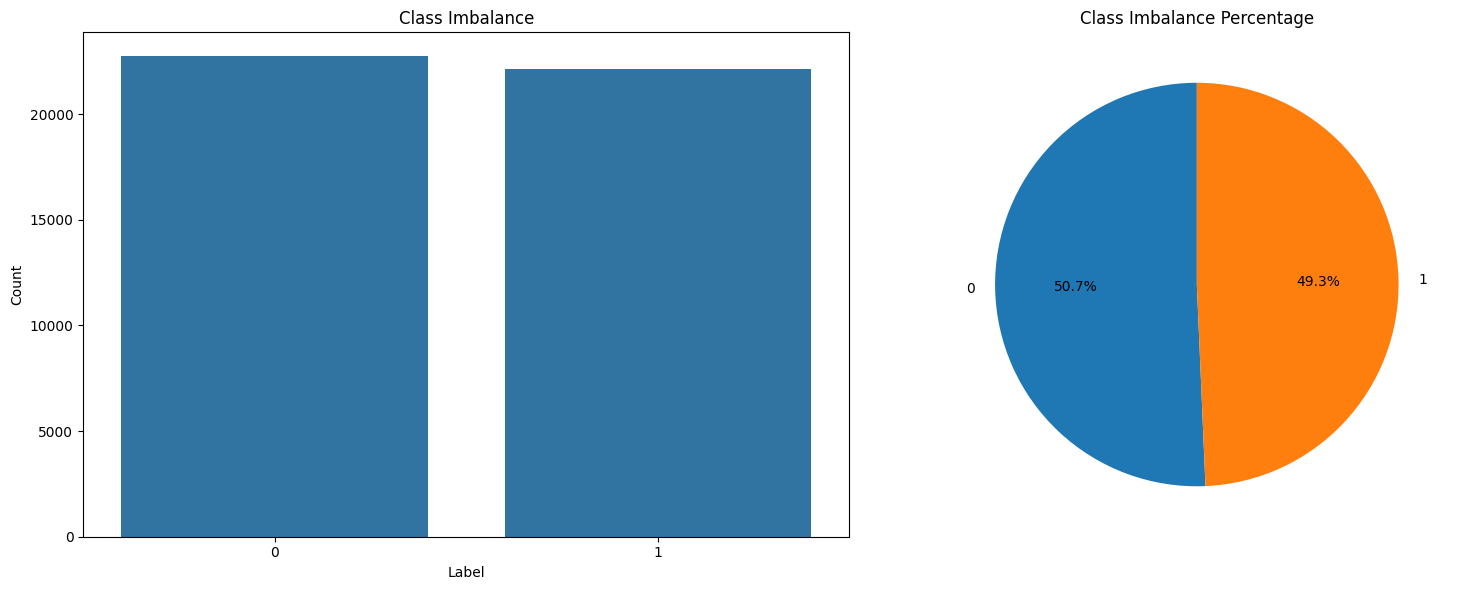

In [19]:
# Detect class imbalance
class_balance = df["label"].value_counts()
print(f"Class Balance: \n{class_balance}")

# Plot class imbalance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=class_balance.index, y=class_balance.values, ax=axes[0])
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")
axes[0].set_title("Class Imbalance")

axes[1].pie(class_balance, labels=class_balance.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Class Imbalance Percentage")

plt.tight_layout()
plt.show()

The dataset is well balanced, with only about a **4% difference between** classes. This slight variation is negligible and does not significantly affect the training process.

In [20]:
# Ensuring text quality

# Removing Line breaks "\n"
df['text'] = df['text'].str.replace('\n', ' ')

display(df.head())

# Count short and long messages
print("\nNumber of Long messages:", df[df['text'].str.len() > 1000].shape[0])
print("Number of Short messages:", df[df['text'].str.len() < 100].shape[0])

,text,label
0,"Hello Micheal Gary Scott, We’ve received yo...",0
1,Your application was sent to Healthify ͏ ͏ ͏ ͏...,0
2,Thank you for Applying to Amazon! Amazon.jobs ...,0
3,IBM Careers IBM Careers IBM Dear Micheal Ga...,0
4,IBM Careers IBM Careers IBM Ref: 14499 - Bu...,0



Number of Long messages: 18869
Number of Short messages: 1374


The process involved removing line breaks to ensure the model focuses on vocabulary and linguistic patterns rather than formatting artifacts.

In [21]:
# Removing short messages since job offers are rarely short.
df = df[df['text'].str.len() > 100]

display(df)

,text,label
0,"Hello Micheal Gary Scott, We’ve received yo...",0
1,Your application was sent to Healthify ͏ ͏ ͏ ͏...,0
2,Thank you for Applying to Amazon! Amazon.jobs ...,0
3,IBM Careers IBM Careers IBM Dear Micheal Ga...,0
4,IBM Careers IBM Careers IBM Ref: 14499 - Bu...,0
...,...,...
47210,DataMind is currently seeking an experienced D...,0
47211,NextLogic is currently seeking an experienced ...,0
47212,NextLogic is currently seeking an experienced ...,0
47217,ByteCore is currently seeking an experienced M...,0


Since most job offers are medium to long length. We remove the short character texts in the dataset.

C:\Users\marti\AppData\Local\Temp\ipykernel_9980\2607748484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_lengths.index, y=average_lengths.values, palette='viridis')


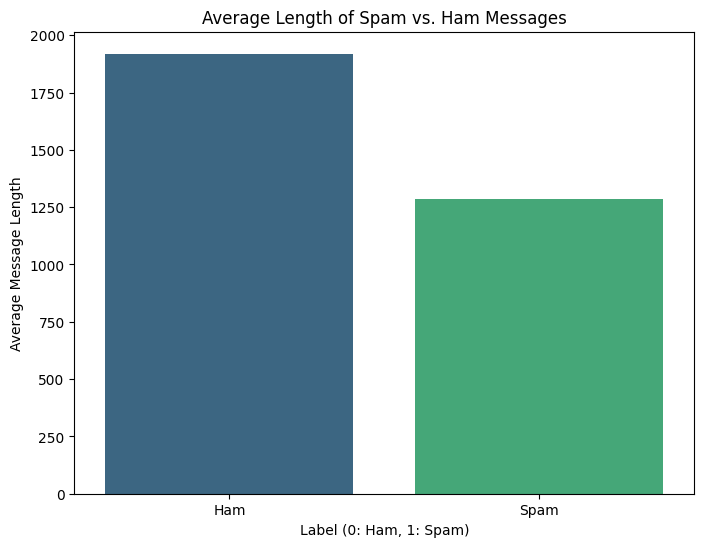

In [22]:
# Compare the average lenght of spam vs ham messages
average_lengths = df.groupby('label')['text'].apply(lambda x: x.str.len().mean())

# Plot the differences with color distinction
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lengths.index, y=average_lengths.values, palette='viridis')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Average Message Length')
plt.title('Average Length of Spam vs. Ham Messages')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

Ham messages are, on average, much longer than spam messages — showing that legitimate emails tend to contain more detailed content, while spam is usually shorter.

## 🤖 **Creating the Model**
The model is built using PyTorch and uses RNN's Long Short-Term Memory (LSTM) networks to capture sequential dependencies in text. By transforming raw job offer messages into tokenized and padded sequences, the model learns contextual patterns that distinguish legitimate job opportunities from spam. The architecture combines an embedding layer, an LSTM encoder, and a dense classification layer, optimized with binary cross-entropy loss. This design ensures robust detection performance while remaining interpretable and adaptable for real-world deployment.

### Preparing the data
The preprocessing pipeline was designed to transform raw text into a format suitable for LSTM training. The steps included:
- **Splitting the dataset** into training, validation, and test sets to ensure fair evaluation.
- **Tokenizing** the text using a *HuggingFace* tokenizer to break messages into subword units.
- **Encoding and padding sequences** to create uniform input lengths for the model.
- **Wrapping the data into PyTorch Dataset and DataLoader** objects for efficient batching, shuffling, and GPU‑ready training.

In [23]:
# Split data into training, validation, and test split
from sklearn.model_selection import train_test_split

# First split: 80% for training+validation, 20% for test
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Second split: 70% of the remaining (80%) for training, 30% for validation (which is 20% of the original data)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {val_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (26076, 2)
Validation data shape: (8692, 2)
Test data shape: (8692, 2)


#### **Tokenizing**

In [24]:
# Tokenize message using huggingface
from tokenizers import Tokenizer, models, trainers, pre_tokenizers

In [25]:
# Break each message into tokens

from pathlib import Path

tokenizer_path = Path('tokenizer.json')

if tokenizer_path.exists():
    print(f"Loading tokenizer from {tokenizer_path}")
    tokenizer = Tokenizer.from_file(str(tokenizer_path))
else:
    print("Tokenizer not found, creating a new one.")
    # Initialize a BPE tokenizer
    tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
    trainer = trainers.BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

    # Pre-tokenize the text using whitespace
    tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

    # Train the tokenizer on the training data
    tokenizer.train_from_iterator(train_df['text'], trainer=trainer)

    # Save the tokenizer
    tokenizer.save(str(tokenizer_path))
    print(f"Tokenizer saved to {tokenizer_path}")


# Function to tokenize text in a dataframe
def tokenize_dataframe(df, tokenizer):
    df['tokenized_text'] = df['text'].apply(lambda x: tokenizer.encode(x).ids)
    return df

# Tokenize the text in the training, validation, and test sets
train_df = tokenize_dataframe(train_df, tokenizer)
val_df = tokenize_dataframe(val_df, tokenizer)
test_df = tokenize_dataframe(test_df, tokenizer)

# Display the first few rows of the tokenized training data
display(train_df.head())

Loading tokenizer from tokenizer.json


,text,label,tokenized_text
38431,seit dem jahr escapenumber ist das unternehmen...,1,"[21477, 1816, 7876, 101, 314, 413, 4700, 18315..."
9231,looking for cheap drugs what about escapenumbe...,1,"[1218, 343, 2794, 1564, 587, 619, 314, 2640, 3..."
10346,the original message was received at tue escap...,1,"[320, 1250, 736, 492, 1637, 317, 2370, 314, 11..."
15560,corporate image can say a lot of things about ...,1,"[2916, 2106, 426, 916, 84, 877, 334, 1823, 619..."
36302,"structure technology report may 10 th , 2005 -...",1,"[2628, 1756, 827, 536, 850, 305, 31, 2998, 32,..."


In [26]:
# Encode text
import torch
from torch.nn.utils.rnn import pad_sequence

# Get the vocabulary size
vocab_size = tokenizer.get_vocab_size()
print(f"Vocabulary size: {vocab_size}")

# Define the maximum sequence length
max_len = 128

def encode_and_pad(df, tokenizer, max_len):
    # Pad the tokenized sequences and convert to tensors
    sequences = [torch.tensor(seq) for seq in df['tokenized_text']]
    padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=tokenizer.token_to_id("[PAD]"))[:, :max_len]

    # Ensure all sequences have the same length after slicing
    padded_sequences = torch.nn.functional.pad(padded_sequences, (0, max_len - padded_sequences.shape[1]), value=tokenizer.token_to_id("[PAD]"))

    # Convert labels to tensors
    labels = torch.tensor(df['label'].values)

    return padded_sequences, labels

train_padded_sequences, train_labels = encode_and_pad(train_df, tokenizer, max_len)
val_padded_sequences, val_labels = encode_and_pad(val_df, tokenizer, max_len)
test_padded_sequences, test_labels = encode_and_pad(test_df, tokenizer, max_len)

print(f"\nShape of training sequences: {train_padded_sequences.shape}")
print(f"Shape of validation sequences: {val_padded_sequences.shape}")
print(f"Shape of test sequences: {test_padded_sequences.shape}")

print(f"\nShape of training labels: {train_labels.shape}")
print(f"Shape of validation labels: {val_labels.shape}")
print(f"Shape of test labels: {test_labels.shape}")

Vocabulary size: 30000

Shape of training sequences: torch.Size([26076, 128])
Shape of validation sequences: torch.Size([8692, 128])
Shape of test sequences: torch.Size([8692, 128])

Shape of training labels: torch.Size([26076])
Shape of validation labels: torch.Size([8692])
Shape of test labels: torch.Size([8692])


In [27]:
# Wrap the padded sequence and labels into a Dataset
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(train_padded_sequences, train_labels)
val_dataset = TensorDataset(val_padded_sequences, val_labels)
test_dataset = TensorDataset(test_padded_sequences, test_labels)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Training dataset size: 26076
Validation dataset size: 8692
Test dataset size: 8692


In [28]:
# Using a DataLoader to batch them, shuffle training data, and feed them efficiently into the model.
from torch.utils.data import DataLoader

batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

print(f"Number of batches in training dataloader: {len(train_dataloader)}")
print(f"Number of batches in validation dataloader: {len(val_dataloader)}")
print(f"Number of batches in test dataloader: {len(test_dataloader)}")

Number of batches in training dataloader: 408
Number of batches in validation dataloader: 136
Number of batches in test dataloader: 136


### 🤖 **Model Creation**
The model leverages a Long Short-Term Memory (LSTM) architecture, a variant of Recurrent Neural Networks (RNNs) well-suited for capturing sequential dependencies in text. After extensive experimentation, we selected the **AdamW** optimizer with a learning rate of **0.0001** for its stability and improved generalization.

**Key LSTM hyperparameters include:**
- **Embedding dimension:** 100
- **Hidden dimension:** 256
- **Number of layers:** Increased from 2 to 3 to enhance the model’s capacity to capture deeper temporal patterns and improve classification performance
- **Dropout rate:** Raised from 0.2 to 0.3 to mitigate overfitting while maintaining model expressiveness

These adjustments were guided by empirical validation and contributed to measurable gains in both precision and recall during evaluation.

In [29]:
from torch.nn import LSTM
import torch.nn as nn

# Define LSTM hyperparameters
embedding_dim = 100 # Dimension of the word embeddings
hidden_dim = 256 # Number of hidden units in the LSTM
output_dim = 1 # Output dimension (1 for binary classification)
num_layers = 3 # Number of LSTM layers
bidirectional = True # Whether the LSTM is bidirectional
dropout = 0.3 # Dropout rate

In [30]:
# LSTM Model Definition
class LSTMSpamClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, bidirectional, dropout):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = LSTM(embedding_dim,
                         hidden_dim,
                         num_layers=num_layers,
                         bidirectional=bidirectional,
                         dropout=dropout,
                         batch_first=True)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        # text = [batch size, seq len]

        embedded = self.dropout(self.embedding(text))
        # embedded = [batch size, seq len, emb dim]

        output, (hidden, cell) = self.lstm(embedded)
        # output = [batch size, seq len, hidden dim * num directions]
        # hidden = [num layers * num directions, batch size, hidden dim]
        # cell = [num layers * num directions, batch size, hidden dim]

        # Concatenate the final forward and backward hidden states
        if self.lstm.bidirectional:
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1,:,:]
        # hidden = [batch size, hidden dim * num directions]

        dense_output = self.fc(hidden)
        # dense_output = [batch size, output dim]

        return dense_output

In [31]:
import torch.optim as optim

# Instantiate the model
model = LSTMSpamClassifier(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, bidirectional, dropout)

# Define Loss Function (BCEWithLogitsLoss)
criterion = nn.BCEWithLogitsLoss()

# Define Optimizer (ADAM)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

### **Training Loop**
The training loop was configured to run for **10 epochs**, reduced from the original 20 after empirical testing. Extended training led to overfitting, with the model beginning to memorize patterns rather than generalize. Limiting the epochs to 10 preserved performance while maintaining generalization across unseen data.

In [32]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to calculate accuracy
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 correct, this returns 0.8.
    """
    # Round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() # Convert to float for division
    acc = correct.sum() / len(correct)
    return acc

# Training function
def train(model, dataloader, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in dataloader:
        text, labels = batch
        text = text.to(device)
        labels = labels.to(device).float().unsqueeze(1) # Ensure labels are float and have shape [batch_size, 1]

        optimizer.zero_grad()

        predictions = model(text)

        loss = criterion(predictions, labels)

        acc = binary_accuracy(predictions, labels)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

# Evaluation function
def evaluate(model, dataloader, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    all_preds = []
    all_labels = []

    model.eval()

    with torch.no_grad():
        for batch in dataloader:
            text, labels = batch
            text = text.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            predictions = model(text)

            loss = criterion(predictions, labels)

            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

            # Store predictions and labels for metrics calculation
            rounded_preds = torch.round(torch.sigmoid(predictions))
            all_preds.append(rounded_preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # Concatenate all predictions and labels
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)


    return epoch_loss / len(dataloader), epoch_acc / len(dataloader), precision, recall, f1, all_labels, all_preds

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

In [34]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize lists to store metrics
train_losses = []
train_accs = []
valid_losses = []
valid_accs = []
valid_precisions = []
valid_recalls = []
valid_f1s = []


# Training loop
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion, device)

    # Call the modified evaluate function
    valid_loss, valid_acc, valid_precision, valid_recall, valid_f1, valid_labels, valid_preds = evaluate(model, val_dataloader, criterion, device)

    # Store metrics
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    valid_precisions.append(valid_precision)
    valid_recalls.append(valid_recall)
    valid_f1s.append(valid_f1)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'spam-ham-detection-best-model.pt')

    print(f'Epoch: {epoch+1:02}')
    # Displays the output for each epoch
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Valid. Loss: {valid_loss:.3f} | Valid. Acc: {valid_acc*100:.2f}%')
    print(f'\t Precision: {valid_precision:.3f} | Recall: {valid_recall:.3f} | F1: {valid_f1:.3f}')

Epoch: 01
	Train Loss: 0.319 | Train Acc: 86.35%
	 Valid. Loss: 0.237 | Valid. Acc: 90.53%
	 Precision: 0.858 | Recall: 0.967 | F1: 0.909
Epoch: 02
	Train Loss: 0.200 | Train Acc: 92.06%
	 Valid. Loss: 0.147 | Valid. Acc: 94.56%
	 Precision: 0.929 | Recall: 0.962 | F1: 0.945
Epoch: 03
	Train Loss: 0.145 | Train Acc: 94.61%
	 Valid. Loss: 0.120 | Valid. Acc: 95.59%
	 Precision: 0.941 | Recall: 0.971 | F1: 0.956
Epoch: 04
	Train Loss: 0.122 | Train Acc: 95.48%
	 Valid. Loss: 0.107 | Valid. Acc: 96.35%
	 Precision: 0.944 | Recall: 0.984 | F1: 0.963
Epoch: 05
	Train Loss: 0.112 | Train Acc: 95.92%
	 Valid. Loss: 0.127 | Valid. Acc: 95.80%
	 Precision: 0.926 | Recall: 0.993 | F1: 0.959
Epoch: 06
	Train Loss: 0.094 | Train Acc: 96.57%
	 Valid. Loss: 0.137 | Valid. Acc: 95.29%
	 Precision: 0.918 | Recall: 0.992 | F1: 0.954
Epoch: 07
	Train Loss: 0.085 | Train Acc: 96.86%
	 Valid. Loss: 0.088 | Valid. Acc: 97.03%
	 Precision: 0.962 | Recall: 0.978 | F1: 0.970
Epoch: 08
	Train Loss: 0.074 | Tra

#### **Train and Val Graph Comparison**
Based on the visualization the training is a successs in terms of the comparison of the training and validation losses and accuracies.

**Left Graph:**
- **Trend:** Both training and validation loss decrease steadily across the 10 epochs.
- **Interpretation:**
  - The model is learning effectively—loss reduction means it's minimizing prediction errors.
  - The validation loss fluctuates slightly but follows the downward trend, suggesting no major overfitting.
- **Insight:** This confirms that reducing the training from 20 to 10 epochs was a smart move. The model generalizes well without memorizing the data.

**Right Graph:**
- **Trend:** Accuracy improves consistently for both training and validation sets.
- **Validation Accuracy:** Closely tracks training accuracy, which is a strong indicator of good generalization.
- **Final Epoch:** Accuracy nears 97%, showing high performance on unseen data.

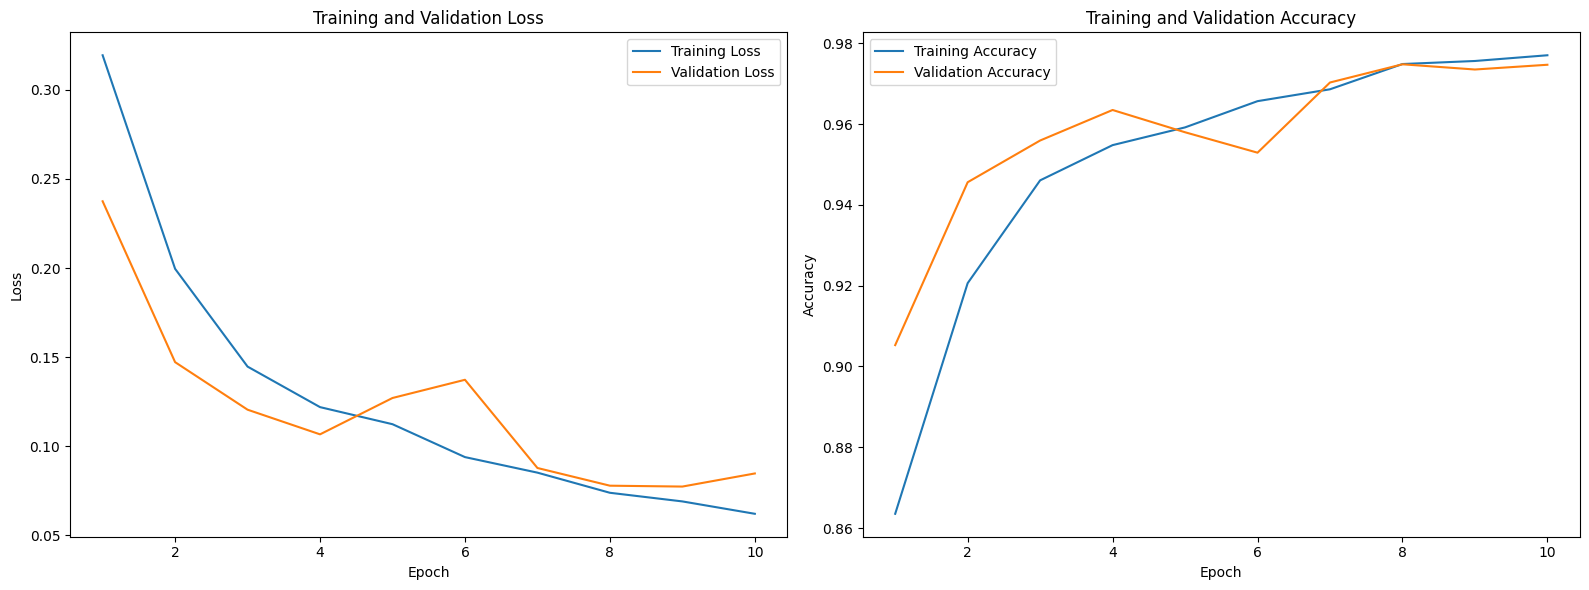

In [35]:
# Plot training and validation loss and accuracy
import matplotlib.pyplot as plt

epochs = range(1, N_EPOCHS + 1)

plt.figure(figsize=(16, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, label='Training Accuracy')
plt.plot(epochs, valid_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### **Testing**

In [36]:
# Evaluation function for the test set
def test_evaluate(model, dataloader, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    all_preds = []
    all_labels = []

    model.eval()

    with torch.no_grad():
        for batch in dataloader:
            text, labels = batch
            text = text.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            predictions = model(text)

            loss = criterion(predictions, labels)

            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

            rounded_preds = torch.round(torch.sigmoid(predictions))
            all_preds.append(rounded_preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader), precision, recall, f1, all_labels, all_preds

# Run the model on test set
model.load_state_dict(torch.load('spam-ham-detection-best-model.pt'))

test_loss, test_acc, test_precision, test_recall, test_f1, test_labels, test_preds = test_evaluate(model, test_dataloader, criterion, device)

Test Loss: 0.081 | Test Acc: 97.33%
Test Precision: 0.967 | Test Recall: 0.980 | Test F1: 0.973


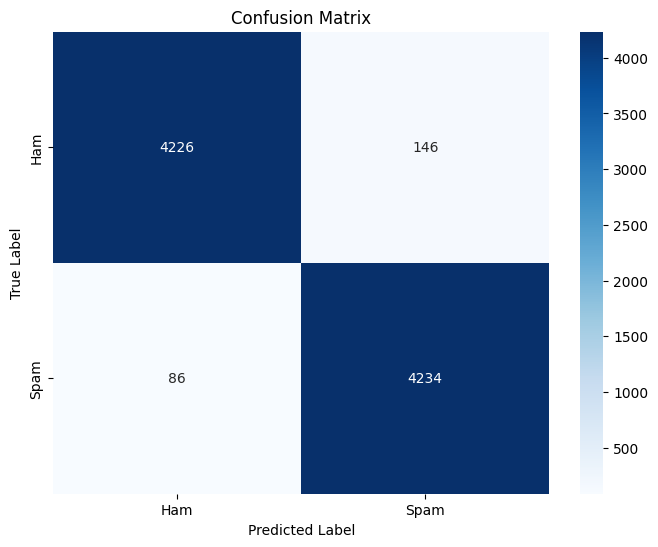

In [37]:
# Show final metrics
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')
print(f'Test Precision: {test_precision:.3f} | Test Recall: {test_recall:.3f} | Test F1: {test_f1:.3f}')

# Create Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix showed that the model has **high accuraccy** in distinguishin spam from ham job offers. Moreover, the model is **minimaly aggressive** with only 146 false positives, which is a good indication that the model is ready to be deployed in real-world applications.